In [227]:
#Import the necessary libraries, Modules and classifiers
import numpy as np #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #package providing fast, flexible, and expressive data structures, designed  
#to make working with “relational” or “labeled” data both easy and intuitive.

import matplotlib.pyplot as plt #standard package for plotting graphs
import seaborn as sns #visualization library based on matplotlib
%matplotlib inline 
#IPython-specific directive which causes IPython to display matplotlib plots in a notebook cell 
#rather than in another window (comment in the same line as  inline command causes an error) 

from sklearn.model_selection import train_test_split #module for splitting data in train/test set
from sklearn.model_selection import cross_val_score  #for calculating the cross-validation-score
from sklearn.tree import DecisionTreeClassifier #package for modeling with decision trees

In [228]:
#read the data from a csv-file, ensure that the  values are separated by commas otherwise you need to   
#specify the delimiter explicitly within the following load-statement
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0)

hr_data.head() #show the first five entries; attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [229]:
hr_data.rename(columns={'sales':'department'}, inplace=True) #renaming columns, note: need to specify 
#the existing label first followed by the new label to rename it to the afterward 
hr_data_new = pd.get_dummies(hr_data, ['department', 'salary'] ,drop_first = True) #Whether to get k-1 
#dummies out of k categorical levels by removing the first level; New in version 0.18.0.

In [230]:
hr_data_new.columns #show the new column names of new table

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [231]:
X = hr_data_new.drop('left', axis=1) #remove the target variable from the feature list
y = hr_data_new['left'] #store the target separately

#use of train_test_split to create 4 containers for target and feature variables with a given proportion (40%)
#and a  random seed (42) to get a a pseudorandom split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [232]:
#shape-method returns the dimensions of the created arrays
print  (X_train.shape)
print  (X_test.shape)
print  (y_train.shape)
print  (y_test.shape)

(8999, 18)
(6000, 18)
(8999,)
(6000,)


In [233]:
dt = DecisionTreeClassifier(random_state=42) #instantiate the decision tree classifier
dt.fit(X_train, y_train) #fit the training data to the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [234]:
from sklearn.model_selection import cross_val_score #evaluate a score by cross-validation
#to read more about cross validation please see:
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

#first show Score on the training data
print('Score: ', dt.score(X_train, y_train))
print('Cross validation score, 10-fold cv: \n', cross_val_score(dt, X_train, y_train, cv=10)) 
#we used the 10-fold cross validation and calculate the mean-value of 10-fold cross validation
print('Mean cross validation score: ', cross_val_score(dt,X_train,y_train,cv=10).mean())

Score:  1.0
Cross validation score, 10-fold cv: 
 [ 0.97666667  0.98111111  0.96666667  0.96333333  0.97444444  0.98
  0.98222222  0.97444444  0.97444444  0.98442714]
Mean cross validation score:  0.97577604746


In [235]:
#as second step we proceed it in the same manner on the testing set
print('Score: ', dt.score(X_test, y_test))
print('Cross validation score, 10-fold cv: \n', cross_val_score(dt, X_test, y_test, cv=10))
print('Mean cross validation score: ', cross_val_score(dt,X_test,y_test,cv=10).mean())

Score:  0.975
Cross validation score, 10-fold cv: 
 [ 0.97004992  0.95507488  0.97166667  0.97        0.965       0.96333333
  0.95        0.96833333  0.96994992  0.96494157]
Mean cross validation score:  0.964834961116


In [236]:
predictions = dt.predict(X_test) # and now use of the classifier on the testing set and instantiate for predicting

In [237]:
###Evaluation###

In [238]:
from sklearn.metrics import confusion_matrix, classification_report #we import modules for evaluation of the model
print('Classification report: \n', classification_report(y_test, predictions,labels=None)) #and use the classification
#report to show main classification metrics  

Classification report: 
              precision    recall  f1-score   support

          0       0.99      0.98      0.98      4588
          1       0.93      0.96      0.95      1412

avg / total       0.98      0.97      0.98      6000



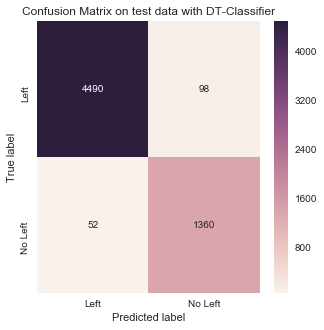

In [239]:
cm = confusion_matrix(y_test, predictions) 
#The confusion matrix is used to evaluate the quality of the output of the DT-classifier  
#We use it in combination with the heatmap to have a more visual interpretation of the
#misclassified objects (employees).

#values are stored in the dataframe df_cm and reused to build the heatmap
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],  #create a dataframe for the unique entries in the target 
                  columns = [i for i in np.unique(y)])
 
plt.figure(figsize = (5,5)) #we plot the heatmap with a size of 5 to 5 inches
sns.heatmap(df_cm, annot=True,  #annot=True is printing the number in each category
         fmt='.0f', #without a decimal place because here are only whole numbers possible
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix on test data with DT-Classifier');

Area Under the Curve: 0.970906367393


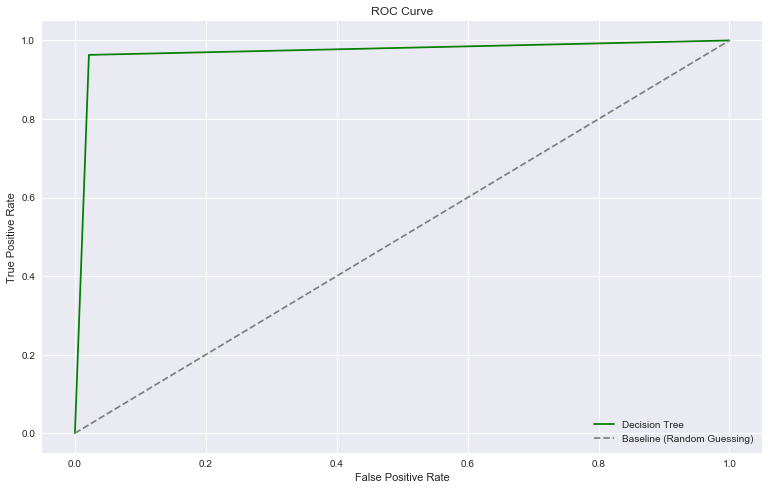

In [240]:
#we use ROC curve for visualization of the true positive rate (TPR) against the false positive rate (FPR)
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics
probabilities = dt.predict_proba(X_test) #To be able to plot the curve probability estimates are used
#and we calculate them with our Decision Tree classifier.
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])  #curve is calculated for the entries in 
#y_test against their calculated prediction with Decision Tree classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='g', label='Decision Tree')
rocax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate')  #labeling y-axis
rocax.set_title('ROC Curve') #labeling the diagram itself
rocax.legend() 

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1]))

In [241]:
importances = dt.feature_importances_   #The relative rank (i.e. importance) of a feature used as a 
#decision node in a tree can be used to assess the relative importance of that feature (with respect 
#to the predictability of the target variable)
print("Feature importances: \n")
for f in range(len(X.columns)):  #for-loop with iteration = number of features
    print('•', X.columns[f], ":", importances[f]) #print each  line

Feature importances: 

• satisfaction_level : 0.494043622144
• last_evaluation : 0.156871107787
• number_project : 0.100981885493
• average_montly_hours : 0.0866330355752
• time_spend_company : 0.141469531707
• Work_accident : 0.00065650976285
• promotion_last_5years : 2.69161969936e-05
• department_RandD : 0.0003913549549
• department_accounting : 0.000743909266437
• department_hr : 0.000912304898985
• department_management : 0.000815303366251
• department_marketing : 0.000288147901791
• department_product_mng : 0.000721338175344
• department_sales : 0.00144857876081
• department_support : 0.0014221416908
• department_technical : 0.00278212533606
• salary_low : 0.00390242366435
• salary_medium : 0.0058897633187


In [242]:
featureswithimportances = list(zip(X.columns, importances)) #concatenate featurename with its importance
featureswithimportances.sort(key = lambda f: f[1], reverse=True) #sort them with the the help of lambda-
#function (From most important to least important) that is used as a small function within functions

print('Ordered feature importances: \n', '(From most important to least important)\n')

for f in range(len(featureswithimportances)): 
    print(f+1,". ", featureswithimportances[f][0], ": ", featureswithimportances[f][1]) 
#print first (names) and second (values) column from dataframe "featureswithimportances"
#"f+1" starts counting from 1 instead "0"

Ordered feature importances: 
 (From most important to least important)

1 .  satisfaction_level :  0.494043622144
2 .  last_evaluation :  0.156871107787
3 .  time_spend_company :  0.141469531707
4 .  number_project :  0.100981885493
5 .  average_montly_hours :  0.0866330355752
6 .  salary_medium :  0.0058897633187
7 .  salary_low :  0.00390242366435
8 .  department_technical :  0.00278212533606
9 .  department_sales :  0.00144857876081
10 .  department_support :  0.0014221416908
11 .  department_hr :  0.000912304898985
12 .  department_management :  0.000815303366251
13 .  department_accounting :  0.000743909266437
14 .  department_product_mng :  0.000721338175344
15 .  Work_accident :  0.00065650976285
16 .  department_RandD :  0.0003913549549
17 .  department_marketing :  0.000288147901791
18 .  promotion_last_5years :  2.69161969936e-05


In [243]:
from sklearn import metrics #The import of module that includes score functions, 
#performance metrics and pairwise metrics and distance computations.
#more classification-metrics: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.model_selection import GridSearchCV #The grid search provided by GridSearchCV exhaustively 
#generates candidates from a grid of parameter values specified with the param_grid parameter. 

In [244]:
from sklearn.tree import export_graphviz, export  #import modules for printing and exporting the Decision Tree

In [245]:
param_grid = {'max_depth': np.arange(3, 10)} #Return evenly spaced values within a given interval.
#Values are generated within the half-open interval [start, stop) (in other words, the interval 
#including start but excluding stop). 

tree = GridSearchCV(dt, param_grid, cv = 10) #Exhaustive search over 
#specified parameter values; The parameters of the estimator used to apply these methods are 
#optimized by cross-validated grid-search over a parameter grid for an estimator. here 10 folds  

tree.fit( X_train, y_train ) #we adapt the model to our training data

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [246]:
#Hyperparameters cannot be learned by fitting the model, that is why we  use 
#the method best_params_ for returning the best hyperparameter (equal to the best depth of the tree)
tree.best_params_  

{'max_depth': 9}

In [247]:
tree.best_score_ #returning the best cross validated score for the classifier

0.98033114790532283

In [248]:
#Build Final Decision Tree Model
clf_tree = DecisionTreeClassifier( max_depth = 9 , random_state=42) #insert the calculated best hyperparameter
clf_tree.fit( X_train, y_train,) #and fit the model again on the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [249]:
#Now we use the configured classifier again to make predictions (target-variable) on our testing set   
tree_test_pred = pd.DataFrame( { 'actual':  y_test, 
                            'predicted': clf_tree.predict( X_test ) } )

In [250]:
tree_test_pred.sample( n = 10, random_state=1 ) #we use  the sample method to print a randomized choice of them

,actual,predicted
10508,0,0
1599,1,1
979,1,1
11982,0,0
14681,1,1
5821,0,0
6945,0,0
2801,0,0
14880,1,1
2924,0,0


In [251]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )
#In multilabel classification, this function computes subset accuracy: 
#the set of labels predicted for a sample must exactly match the corresponding 
#set of labels in actual.

0.97850000000000004

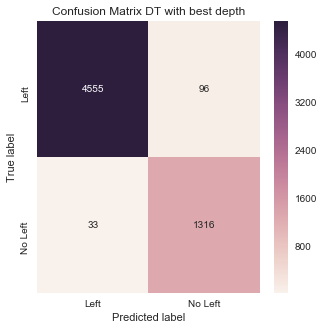

In [252]:
#we plot the confusion matrix in the same manner as we did before but now with
#the classifier using the optimal depth for the tree
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted, #predicted values
                                   tree_test_pred.actual,    #true values
                                   [0,1])
#more information about confusion matrix: 
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
plt.figure(figsize = (5,5)) #w,h tuple in inches
sns.heatmap(tree_cm, annot=True,  #annot=True is printing the number in each category
         fmt='.0f',  #without a decimal place because here are only whole numbers are possible
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix DT with best depth');

In [253]:
###Generate rules from the decision tree###

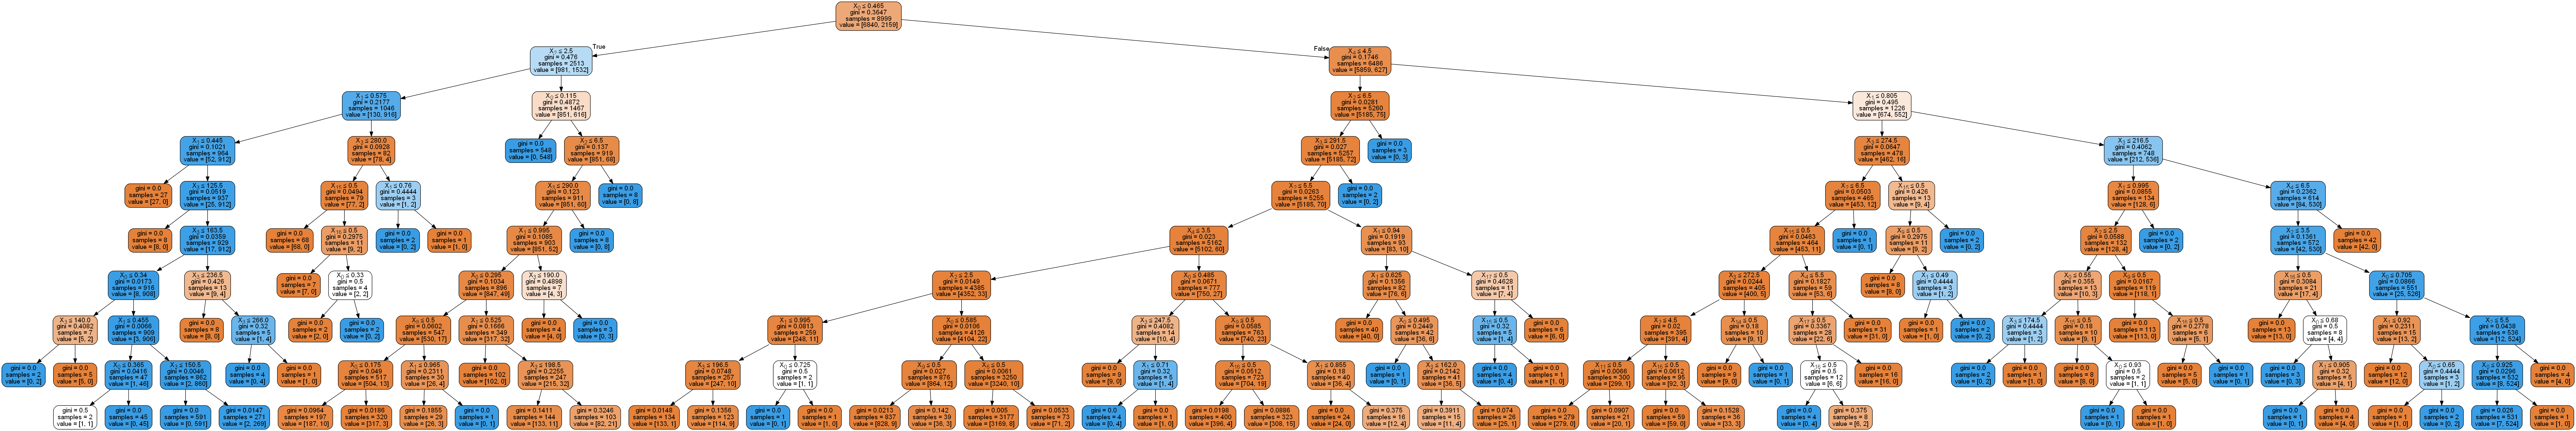

In [254]:
from sklearn import tree #Import of the decision tree classifier.
import pydotplus #Provides a Python Interface to Graphviz’s Dot language.
from IPython.display import Image #provides a class with the same name which 
#is used to represent a PIL image. The module also provides a number of factory functions, 
#including functions to load images from files, and to create new images
dot_data=tree.export_graphviz(clf_tree,filled=True,rounded=True, out_file=None,special_characters=True)
#for further information configuring the output-possibilities look at:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
graph = pydotplus.graph_from_dot_data(dot_data) #Load graph as defined by data in DOT format.
#The data is assumed to be in DOT format. It will be parsed and a Dot class will be returned, 
#representing the graph.
graph.write_png('CART.png') #saves the graph in a new file, that could be opened via you favourite browser
Image(graph.create_png()) #plots  the graph directly in jupyter-notebook 